In [1]:
#import necessary libraries

import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model

In [3]:
#reading in the data and converting to pandas
df = pd.read_csv(r'comscore-activity-unscaled.csv')
matrix_df = df.to_numpy()
print(matrix_df.shape)

(4000, 170)


In [14]:
#splitting to train annd test dataset
train, test = train_test_split(matrix_df, test_size=0.05)
#obtaining only the first few and not X
xtrain = train[:,1:-1]/np.max(train[:,1:-2])
xtest = test[:,1:-1]/np.max(test[:,1:-2])
x_train = np.reshape(xtrain, (len(xtrain), 7, 24, 1))
x_test = np.reshape(xtest, (len(xtest), 7, 24, 1))

In [15]:
# This is the size of our encoded representations
encoding_dim = 12 # 7 floats -> compression of factor 24, assuming the input is 24*7 floats

# This is our input image
input_img = keras.Input(shape=(168,))
# "encoded" is the encoded representation of the input
"""
encoded = layers.Dense(160, activation='relu')(input_img)
encoded = layers.Dense(150, activation='relu')(encoded)
encoded = layers.Dense(140, activation='relu')(encoded)
encoded = layers.Dense(130, activation='relu')(encoded)
encoded = layers.Dense(120, activation='relu')(encoded)
encoded = layers.Dense(110, activation='relu')(encoded)
encoded = layers.Dense(90, activation='relu')(encoded)
encoded = layers.Dense(70, activation='relu')(encoded)
encoded = layers.Dense(50, activation='relu')(encoded)
encoded = layers.Dense(30, activation='relu')(encoded)
encoded = layers.Dense(15, activation='relu')(encoded)
"""
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
"""
decoded = layers.Dense(15, activation='relu')(encoded)
decoded = layers.Dense(30, activation='relu')(decoded)
decoded = layers.Dense(50, activation='relu')(decoded)
decoded = layers.Dense(70, activation='relu')(decoded)
decoded = layers.Dense(90, activation='relu')(decoded)
decoded = layers.Dense(100, activation='relu')(decoded)
decoded = layers.Dense(110, activation='relu')(decoded)
decoded = layers.Dense(120, activation='relu')(decoded)
decoded = layers.Dense(130, activation='relu')(decoded)
decoded = layers.Dense(140, activation='relu')(decoded)
decoded = layers.Dense(150, activation='relu')(decoded)
decoded = layers.Dense(160, activation='relu')(decoded)
"""
decoded = layers.Dense(168, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [16]:
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape = (encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size = 256,
                shuffle=True,
                validation_data=(xtest, xtest))

Epoch 1/100
15/15 [==============================] - 1s 13ms/step - loss: 0.6892 - val_loss: 0.6829
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6788 - val_loss: 0.6660
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6638 - val_loss: 0.6381
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6412 - val_loss: 0.5960
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6091 - val_loss: 0.5440
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5695 - val_loss: 0.4914
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5250 - val_loss: 0.4459
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4797 - val_loss: 0.4089
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4345 - val_loss: 0.3810
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3924 - val_loss: 0.3613
Epoch 11

15/15 [==============================] - 0s 3ms/step - loss: 0.0419 - val_loss: 0.0955
Epoch 84/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0417 - val_loss: 0.0953
Epoch 85/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.0950
Epoch 86/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0415 - val_loss: 0.0948
Epoch 87/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0414 - val_loss: 0.0946
Epoch 88/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0413 - val_loss: 0.0943
Epoch 89/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0412 - val_loss: 0.0942
Epoch 90/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0411 - val_loss: 0.0941
Epoch 91/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0410 - val_loss: 0.0939
Epoch 92/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.0938
Epoch 93/100


In [17]:
#predicting

encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
#encodedimgs = encoder.predict(xtest)
#decodedimgs = autoencoder.predict(xtest)

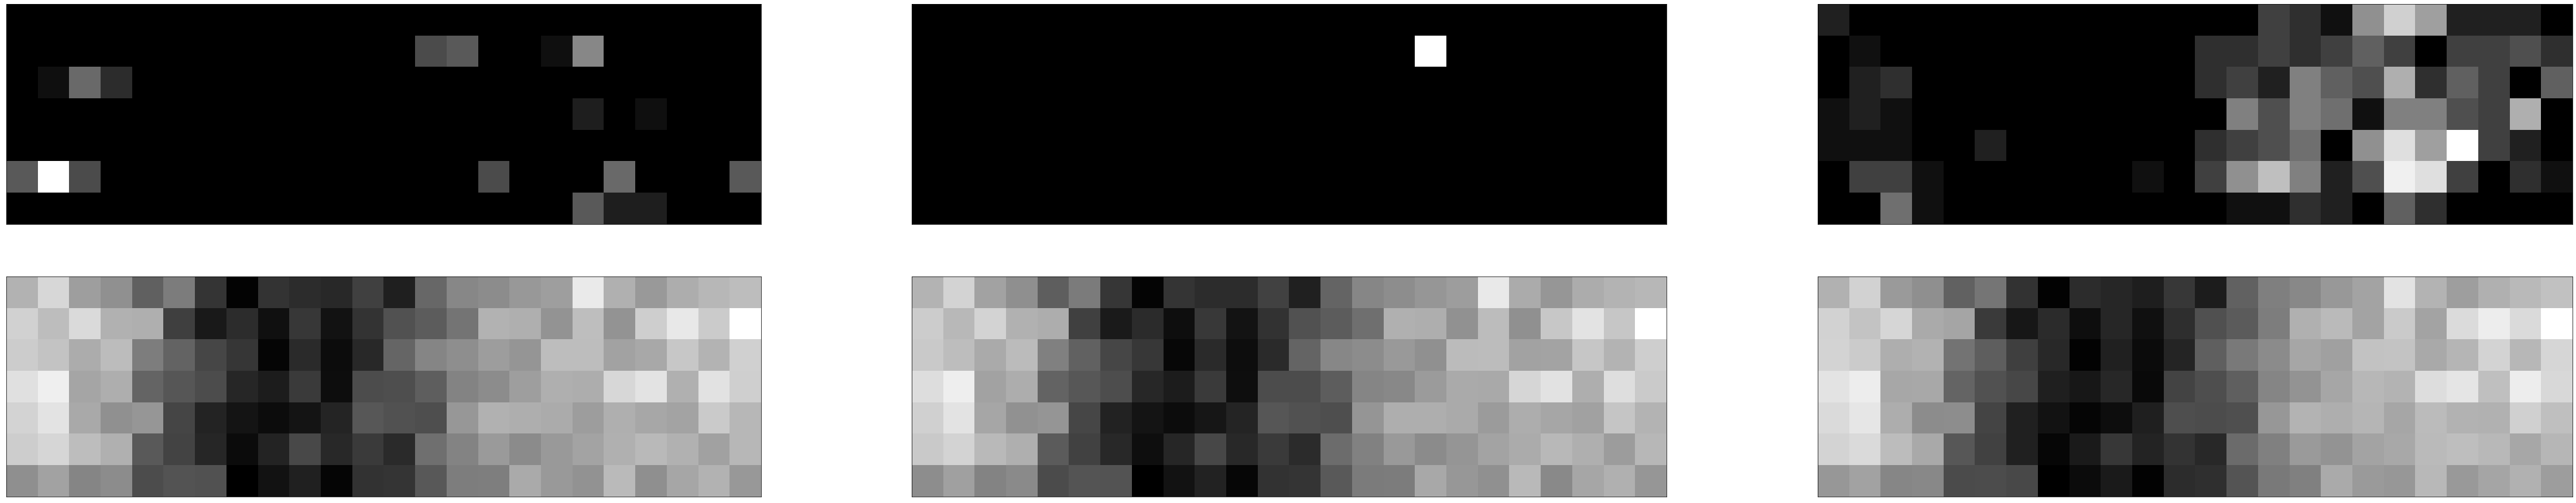

In [18]:
#plot predictios v. actual
n = 3  # How many we will display
plt.figure(figsize=(80, 16))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(7, 24))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(7, 24))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
print(decoded_imgs[0,1:10])
print(decoded_imgs[100, 1:10])

[0.00792202 0.00676426 0.00647458 0.00550184 0.00607353 0.00462225
 0.00359404 0.0045791  0.00442964]
[0.0097301  0.00830215 0.00802761 0.00685814 0.00739712 0.00566053
 0.00445759 0.00552994 0.00535193]


In [20]:
df1 = pd.read_csv(r'quant_transactions.csv')
matrix_df1 = df1.to_numpy()

unique_ids = np.unique(matrix_df1[:,0])
print(np.shape(matrix_df1))
print(len(unique_ids))

(477907, 12)
35759


In [25]:
#col 1: machine ids
#col 2: basket total price
#rest of the cols: demographics
master_mat = np.empty((len(unique_ids), np.shape(matrix_df1)[1]))

for i in range(len(unique_ids)):
    indexes = np.where(matrix_df1[:,0] == unique_ids[i])[0]
    master_mat[i, 2:np.shape(matrix_df1)[1]] = matrix_df1[indexes[0], 2:np.shape(matrix_df1)[1]]
    master_mat[i, 0] = matrix_df1[indexes[0]][0]
    basket_tot = 0
    for j in range(len(indexes)):
        basket_tot += matrix_df1[indexes[j],1]
    master_mat[i, 1] = basket_tot
print(np.shape(master_mat)) #(35759, 12)

master_mat = master_mat[master_mat[:, 0].argsort()]

(35759, 12)


In [26]:
print(len(matrix_df1[:,0]))
print(np.sort(matrix_df[:, -1]))

master_mat1 = np.zeros((4000, 12))

for i in range(4000):
    if matrix_df[i,-1] in master_mat[:, 0]:
        ind = np.where(master_mat[:, 0] == matrix_df[i,-1])[0]
        print(ind)
        master_mat1[i,:] = master_mat[ind,:]
    else:
        pass

master_mat1 = master_mat1[~np.all(master_mat1 == 0, axis=1)]

477907
[ 81253085 122850883 123624731 ... 231322828 231323328 231325759]
[10]
[22]
[43]
[53]
[113]
[122]
[138]
[147]
[148]
[150]
[175]
[234]
[256]
[299]
[326]
[329]
[383]
[391]
[392]
[402]
[420]
[439]
[452]
[457]
[488]
[514]
[520]
[522]
[539]
[541]
[556]
[559]
[562]
[621]
[657]
[663]
[726]
[748]
[751]
[791]
[821]
[880]
[891]
[927]
[937]
[950]
[957]
[961]
[971]
[1018]
[1031]
[1032]
[1059]
[1065]
[1076]
[1077]
[1091]
[1094]
[1098]
[1125]
[1131]
[1192]
[1212]
[1243]
[1279]
[1302]
[1328]
[1392]
[1415]
[1442]
[1455]
[1460]
[1529]
[1583]
[1643]
[1656]
[1716]
[1807]
[1825]
[1905]
[1941]
[1942]
[1958]
[1967]
[1982]
[1984]
[2035]
[2037]
[2040]
[2046]
[2049]
[2070]
[2074]
[2084]
[2102]
[2178]
[2225]
[2235]
[2258]
[2268]
[2283]
[2290]
[2308]
[2347]
[2349]
[2362]
[2377]
[2378]
[2401]
[2406]
[2442]
[2501]
[2507]
[2528]
[2575]
[2591]
[2622]
[2631]
[2678]
[2709]
[2712]
[2722]
[2732]
[2743]
[2756]
[2782]
[2793]
[2808]
[2830]
[2858]
[2861]
[2878]
[2880]
[2887]
[2888]
[2891]
[2934]
[2977]
[3022]
[3037]


[25318]
[25389]
[25406]
[25440]
[25457]
[25465]
[25480]
[25506]
[25543]
[25547]
[25624]
[25632]
[25692]
[25696]
[25699]
[25707]
[25727]
[25743]
[25752]
[25753]
[25769]
[25772]
[25815]
[25816]
[25824]
[25840]
[25863]
[25872]
[25913]
[25952]
[26019]
[26027]
[26030]
[26035]
[26088]
[26098]
[26133]
[26140]
[26176]
[26238]
[26247]
[26264]
[26304]
[26343]
[26364]
[26367]
[26449]
[26477]
[26505]
[26532]
[26541]
[26544]
[26548]
[26561]
[26581]
[26613]
[26659]
[26660]
[26663]
[26686]
[26707]
[26719]
[26791]
[26807]
[26827]
[26859]
[26902]
[26930]
[26970]
[26999]
[27025]
[27045]
[27075]
[27100]
[27108]
[27142]
[27149]
[27162]
[27164]
[27177]
[27180]
[27213]
[27249]
[27253]
[27290]
[27365]
[27382]
[27462]
[27481]
[27538]
[27547]
[27550]
[27573]
[27580]
[27615]
[27645]
[27650]
[27659]
[27662]
[27702]
[27713]
[27716]
[27734]
[27749]
[27772]
[27787]
[27793]
[27799]
[27826]
[27830]
[27832]
[27853]
[27874]
[27876]
[27884]
[27894]
[27904]
[27915]
[27941]
[27946]
[27961]
[27982]
[28053]
[28059]
[28095]


In [7]:
whole1 = np.zeros((np.shape(master_mat1)[0], 170))

for i in range(np.shape(master_mat1)[0]):
    if matrix_df[i,-1] in master_mat1[:, 0]:
        whole1[i, :] = matrix_df[i, :]
    else:
        pass

In [8]:
print(matrix_df[0,:])

[    2201        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        2        3        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        9
        7        6        4       10        8        5       10       17
        2        4        1        0        3        3        0        0
        4        0        0        0        0        0        0        4
        9       11        5        0       11        7        9        9
        6        5        0        0        1        0        0        0
        0        0        0        0        0        0        0        5
        9        2        2        7        3        3        6       10
        5        0        0        0        0        0        0        0
        0        0        0        0        0      

In [12]:
print(master_mat1[0:10,0])
print(master_mat[22,:])
print(master_mat1[2,:])

print(np.shape(master_mat1))
print(np.shape(whole1))

whole = whole1[whole1[:, -1].argsort()]
whole = whole[:,1:-1]
whole_final = np.reshape(whole, (len(whole), 7, 24, 1))
encoded_imgs = encoder.predict(whole)

#encoded_imgs = np.reshape(encoded_imgs[:,:,:,1], (1579, 14))

print(np.shape(whole_final))

[1.22850883e+08 1.39267316e+08 1.49318045e+08 1.53365641e+08
 1.62945400e+08 1.63379979e+08 1.64054373e+08 1.64697257e+08
 1.64699726e+08 1.64744235e+08]
[1.39267316e+08 3.66600000e+01 9.90000000e+01 4.00000000e+00
 1.00000000e+00 4.00000000e+00 1.10000000e+01 0.00000000e+00
 5.00000000e+00 1.00000000e+00 0.00000000e+00 8.41180000e+04]
[1.49318045e+08 6.69600000e+02 3.00000000e+00 3.00000000e+00
 2.00000000e+00 4.00000000e+00 1.10000000e+01 0.00000000e+00
 5.00000000e+00 1.00000000e+00 1.00000000e+00 3.28220000e+04]
(1579, 12)
(1579, 170)


NameError: name 'encoder' is not defined

In [22]:
final_mat = np.concatenate((master_mat1, encoded_imgs), axis=1)
print(final_mat[0,:])
print(final_mat[2,:])
print(final_mat[10,:])

[1.22850883e+08 4.26995000e+03 5.00000000e+00 1.00000000e+00
 5.00000000e+00 8.00000000e+00 1.60000000e+01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 0.00000000e+00 1.58100000e+03
 6.28590405e-01 6.41867697e-01 0.00000000e+00 6.45653427e-01
 1.25643981e+00 7.03237236e-01 6.40043318e-01 6.27059758e-01
 6.46527767e-01 7.68492997e-01 6.32890642e-01 6.40724838e-01]
[1.49318045e+08 6.69600000e+02 3.00000000e+00 3.00000000e+00
 2.00000000e+00 4.00000000e+00 1.10000000e+01 0.00000000e+00
 5.00000000e+00 1.00000000e+00 1.00000000e+00 3.28220000e+04
 6.28590405e-01 6.41867697e-01 0.00000000e+00 6.45653427e-01
 1.25643981e+00 7.03237236e-01 6.40043318e-01 6.27059758e-01
 6.46527767e-01 7.68492997e-01 6.32890642e-01 6.40724838e-01]
[1.65626370e+08 2.39000000e+01 2.00000000e+00 3.00000000e+00
 5.00000000e+00 1.10000000e+01 1.10000000e+01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 0.00000000e+00 7.06610000e+04
 6.28590405e-01 6.41867697e-01 0.00000000e+00 6.45653427e-01
 1.25643981e+00 7.0323

In [23]:
from sklearn.preprocessing import StandardScaler
d = whole1[:, 1:-1]
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(1579, 168)


In [24]:
# Once the data is standardized i.e, mean = 0, std.deviation = 1;
# then the co-variance matrix of A is calculated as : A^T * A

sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of co-variance matrix = ", covar_matrix.shape)

The shape of co-variance matrix =  (168, 168)


In [25]:
#finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (166 and 167) eigenvalues.

values, vectors = eigh(covar_matrix, eigvals=(166,167))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (168, 2)
Updated shape of eigen vectors =  (2, 168)


In [26]:
# projecting the original data sample on the plane 
# formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 168) X (168, 1579)  =  (2, 1579)


In [27]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [28]:
# configuring the parameteres
# the number of components = 10
pca.n_components = 10
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)
print(pca_data)

shape of pca_reduced.shape =  (1579, 10)
[[-3.62855974 -0.06854481  0.10469364 ...  0.04620442 -0.01187267
   0.01566495]
 [ 3.16169373 -2.34987441 -1.27650968 ...  1.17776483 -0.22057947
   0.95867229]
 [-3.62855974 -0.06854481  0.10469364 ...  0.04620442 -0.01187267
   0.01566495]
 ...
 [11.13622175 -4.1607524  -6.92790277 ...  3.32577924 -1.25781461
  -0.84508473]
 [ 8.655779    0.69292354 -4.25551859 ...  3.55371079  0.23577681
  -2.39101091]
 [-3.62855974 -0.06854481  0.10469364 ...  0.04620442 -0.01187267
   0.01566495]]


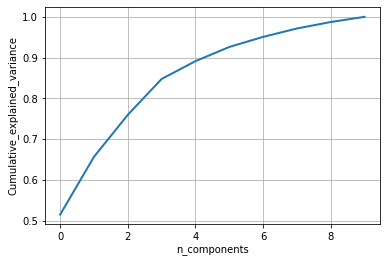

In [29]:
# PCA for dimensionality reduction (non-visualization)

pca.n_components = 10
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is explained.

In [30]:
final_mat = np.concatenate((master_mat1, pca_data), axis=1)
#col 1: machine id
#col 2: basket total price
#col 3: highest lvl of education for hoh (99/3001/3002/3005 = unknown)
#col 4: US geographic region (1 = NE, 2 = NC, 3 = S, 4 = W, 88/99 = unknown)
#col 5: # of ppl in household (99 = unknown)
#col 6: age of hoh (tiered)
#col 7: combined household income (99 = unknown, 11 - 18 = 2014 to present)
#col 8: whether there is a child in household (1 = yes)
#col 9: race of hoh (1 = caucasian, 2 = african american, 3 = asian, 5 = other, -88/99 = other)
#col 10: whether household has broadband (1 = yes)
#col 11: hispanic self identification (1 = hispanic)
#col 12: zipcode

In [31]:
print(final_mat[0,:])


[ 1.22850883e+08  4.26995000e+03  5.00000000e+00  1.00000000e+00
  5.00000000e+00  8.00000000e+00  1.60000000e+01  1.00000000e+00
  1.00000000e+00  1.00000000e+00  0.00000000e+00  1.58100000e+03
 -3.62855974e+00 -6.85448114e-02  1.04693640e-01 -1.92716112e-02
  7.50690260e-02  2.95484992e-03  8.08697594e-02  4.62044678e-02
 -1.18738388e-02  1.56603140e-02]


In [32]:
#turn to pd to deal with factors
final_df = pd.DataFrame(final_mat, columns = ['Machine_ID','Basket_Total_Price','highest_hoh_edu', 'Region', 'household_size','age_of_hoh', 'household_income', 'children', 'race_of_hoh', 'broadband', 'hispanic', 'zipcode', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
pd.get_dummies(final_df, columns=["race_of_hoh", "Region", "highest_hoh_edu"]).head() 



,Machine_ID,Basket_Total_Price,household_size,age_of_hoh,household_income,children,broadband,hispanic,zipcode,PCA1,...,Region_1.0,Region_2.0,Region_3.0,Region_4.0,highest_hoh_edu_1.0,highest_hoh_edu_2.0,highest_hoh_edu_3.0,highest_hoh_edu_4.0,highest_hoh_edu_5.0,highest_hoh_edu_99.0
0,122850883.0,4269.95,5.0,8.0,16.0,1.0,1.0,0.0,1581.0,-3.628560,...,1,0,0,0,0,0,0,0,1,0
1,139267316.0,36.66,1.0,4.0,11.0,0.0,1.0,0.0,84118.0,3.161694,...,0,0,0,1,0,0,0,0,0,1
2,149318045.0,669.60,2.0,4.0,11.0,0.0,1.0,1.0,32822.0,-3.628560,...,0,0,1,0,0,0,1,0,0,0
3,153365641.0,49732.68,5.0,11.0,11.0,1.0,1.0,0.0,62220.0,-3.628560,...,0,1,0,0,0,1,0,0,0,0
4,162945400.0,86.72,2.0,9.0,16.0,1.0,1.0,0.0,75025.0,-3.628560,...,0,0,1,0,0,0,1,0,0,0


In [10]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [27]:
data = final_df[['Basket_Total_Price','highest_hoh_edu', 'Region', 'household_size','age_of_hoh', 'household_income', 'children', 'race_of_hoh', 'broadband', 'hispanic', 'zipcode', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10']]
model = forward_selected(data, data.columns[0]) # amogos

print(model.model.formula)

mod = smf.ols(formula=model.model.formula, data=data)
res = mod.fit()
print(res.summary())

NameError: name 'final_df' is not defined

In [66]:
mod_all = smf.ols(formula='Basket_Total_Price ~ highest_hoh_edu+C(Region)+household_size+age_of_hoh+household_income+children+C(race_of_hoh)+broadband+hispanic+PCA1+PCA2+PCA3+PCA4+PCA5+PCA6+PCA7+PCA8+PCA9+PCA10', data=data)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:     Basket_Total_Price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8212
Date:                Mon, 11 Apr 2022   Prob (F-statistic):              0.707
Time:                        09:21:24   Log-Likelihood:                -16412.
No. Observations:                1579   AIC:                         3.287e+04
Df Residuals:                    1555   BIC:                         3.300e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1962.29

In [64]:
mod2 = smf.ols(formula='Basket_Total_Price ~ age_of_hoh + 1', data=data)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:     Basket_Total_Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.369
Date:                Mon, 11 Apr 2022   Prob (F-statistic):             0.0666
Time:                        01:54:46   Log-Likelihood:                -16420.
No. Observations:                1579   AIC:                         3.284e+04
Df Residuals:                    1577   BIC:                         3.285e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    668.2874    625.384      1.069      0.2

In [69]:
mod3 = smf.ols(formula='Basket_Total_Price ~ household_size + 1', data=data)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:     Basket_Total_Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.02352
Date:                Mon, 11 Apr 2022   Prob (F-statistic):              0.878
Time:                        09:49:56   Log-Likelihood:                -16421.
No. Observations:                1579   AIC:                         3.285e+04
Df Residuals:                    1577   BIC:                         3.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1780.9879    258.273      6.

In [65]:
mod4 = smf.ols(formula='Basket_Total_Price ~ PCA1 + 1', data=data)
res4 = mod4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:     Basket_Total_Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04251
Date:                Mon, 11 Apr 2022   Prob (F-statistic):              0.837
Time:                        01:55:12   Log-Likelihood:                -16421.
No. Observations:                1579   AIC:                         3.285e+04
Df Residuals:                    1577   BIC:                         3.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1755.9618    200.183      8.772      0.0

In [67]:
mod5 = smf.ols(formula='Basket_Total_Price ~ PCA10 + 1', data=data)
res5 = mod5.fit()
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:     Basket_Total_Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06718
Date:                Mon, 11 Apr 2022   Prob (F-statistic):              0.796
Time:                        09:48:47   Log-Likelihood:                -16421.
No. Observations:                1579   AIC:                         3.285e+04
Df Residuals:                    1577   BIC:                         3.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1755.9618    200.181      8.772      0.0